# **NOTEBOOK FOR ANALYSIS OF OULAD DATA**

**Goal is to find student dropout factors**

## **Data Import, Creating Connection and Checking the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\oulad dropout analysis"))

import src.plots as P
import src.stat_tests as S

import warnings
warnings.filterwarnings('ignore')

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\oulad dropout analysis\data\processed_data\processed_oulad_data.csv")

In [3]:
cat_cols = data.select_dtypes(include='object').columns.values.tolist()
num_cols = data.select_dtypes(include='number').columns.values.tolist()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code_module               32593 non-null  object 
 1   code_presentation         32593 non-null  object 
 2   gender                    32593 non-null  object 
 3   region                    32593 non-null  object 
 4   highest_education         32593 non-null  object 
 5   imd_band                  31482 non-null  object 
 6   age_band                  32593 non-null  object 
 7   num_of_prev_attempts      32593 non-null  int64  
 8   studied_credits           32593 non-null  int64  
 9   disability                32593 non-null  object 
 10  final_result              32593 non-null  object 
 11  date_registration         32593 non-null  float64
 12  date_unregistration       10072 non-null  float64
 13  total_vle_used            32593 non-null  float64
 14  total_

In [5]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,55.0,934.0,5.0,5.0,0.0,82.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,84.0,1435.0,5.0,5.0,0.0,66.4
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,22.0,281.0,0.0,0.0,0.0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,82.0,2158.0,5.0,5.0,0.0,76.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,66.0,1034.0,5.0,5.0,0.0,54.4


In [6]:
data[['total_assessments','attempted_assessment','non_attempted_assessment']]= data[['total_assessments','attempted_assessment','non_attempted_assessment']].astype('Int64')

## **Univariate Analysis of data**

In [7]:
data.describe().round(2)

,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,total_vle_used,total_clicks,total_assessments,attempted_assessment,non_attempted_assessment,average_score
count,32593.00,32593.00,32593.00,10072.00,32593.00,32593.00,32593.0,32593.0,32593.0,32593.00
mean,0.16,79.76,-69.39,49.76,60.15,1215.14,5.34,5.28,0.06,57.65
std,0.48,41.07,49.23,82.46,55.90,1692.60,4.33,4.34,0.53,32.93
min,0.00,30.00,-322.00,-365.00,0.00,0.00,0.0,0.0,0.0,0.00
25%,0.00,60.00,-100.00,-2.00,19.00,142.00,1.0,1.0,0.0,43.00
50%,0.00,60.00,-57.00,27.00,46.00,602.00,5.0,5.0,0.0,70.57
75%,0.00,120.00,-29.00,109.00,86.00,1585.00,9.0,9.0,0.0,82.40
max,6.00,655.00,167.00,444.00,413.00,24139.00,14.0,14.0,12.0,100.00


### ***Statistical Insight from numerical columns***

- `studied_credits` ranges from 30 to 655

- `date_registration` ranges from -322 to 176

- `date_unregistration` ranges from -365 to 444

- `total_vle_used` ranges from 0 to 413

- `total_clicks` ranges from 0 to 24139

- `average_score` ranges from 0 to 100

In [8]:
data.describe(include='object')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


### ***Statistical insight from categorical column***

- `region` have 13 unique values

In [9]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,num_of_prev_attempts,7
1,studied_credits,61
2,date_registration,332
3,date_unregistration,416
4,total_vle_used,325
5,total_clicks,5381
6,total_assessments,15
7,attempted_assessment,15
8,non_attempted_assessment,13
9,average_score,2601


In [10]:
data.select_dtypes(include='number').columns

Index(['num_of_prev_attempts', 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks',
       'total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score'],
      dtype='object')

In [11]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,code_module,7
1,code_presentation,4
2,gender,2
3,region,13
4,highest_education,5
5,imd_band,10
6,age_band,3
7,disability,2
8,final_result,4


In [12]:
small_cat_cols = ['code_module', 'code_presentation', 'gender',
       'highest_education', 'imd_band', 'age_band', 'disability','num_of_prev_attempts']

In [13]:
large_num_cols = [ 'studied_credits', 'date_registration',
       'date_unregistration', 'total_vle_used', 'total_clicks','total_assessments', 'attempted_assessment', 'non_attempted_assessment',
       'average_score']

In [14]:
large_cat_cols = ['region']

In [15]:
target_col = ['final_result']

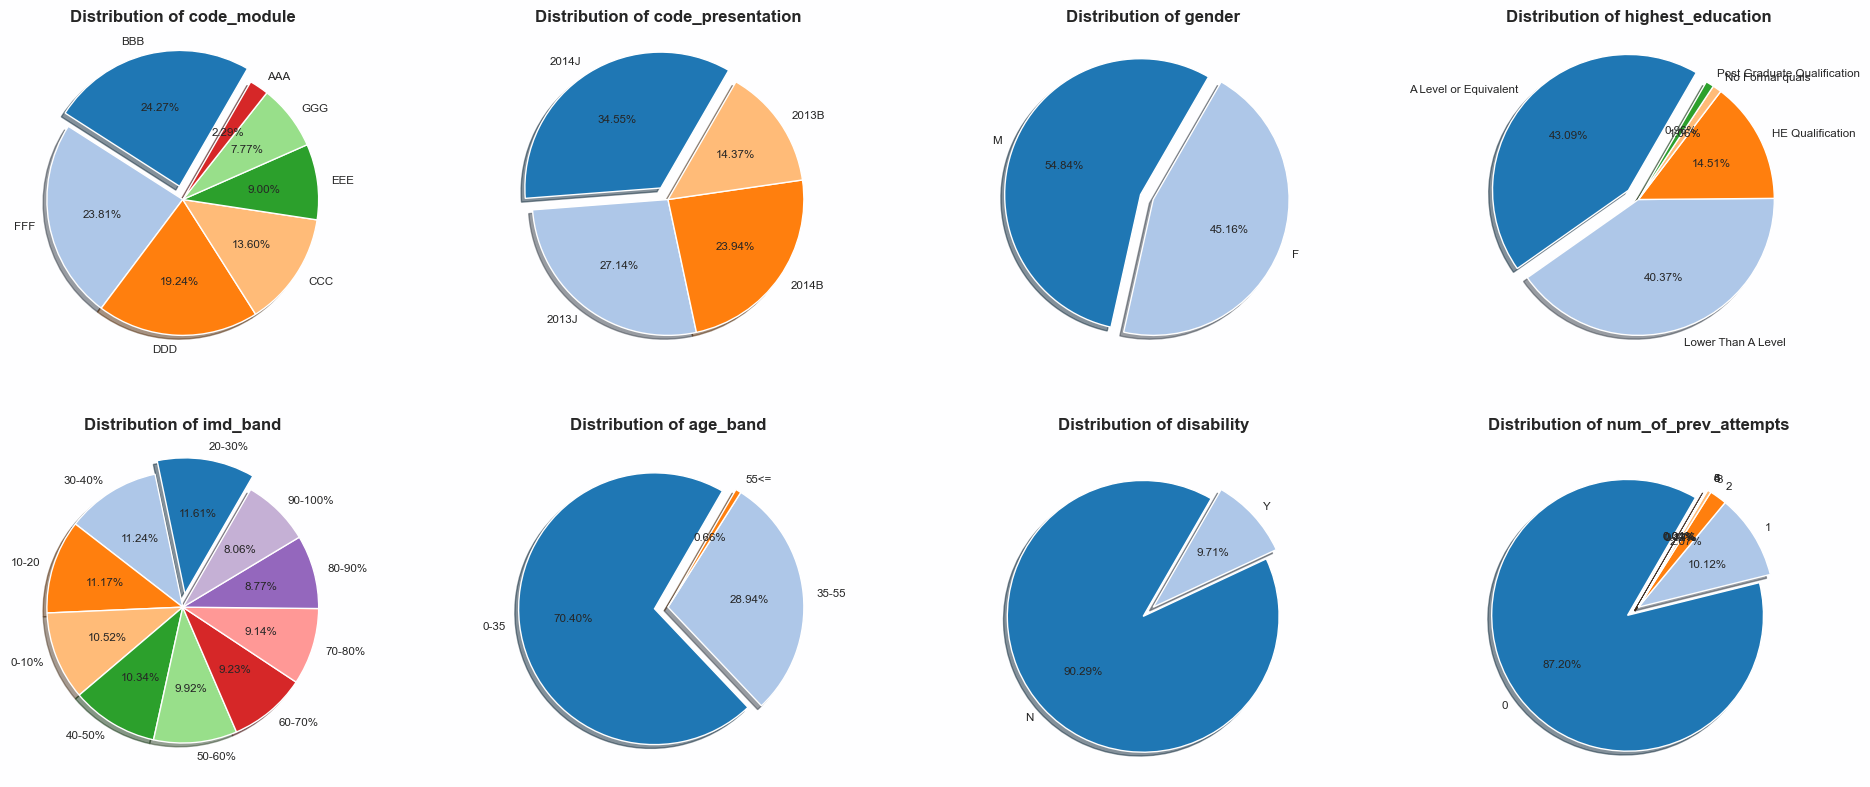

In [16]:
fig = plt.figure(figsize=(24,15))
limit = len(small_cat_cols)
for i,column in enumerate(small_cat_cols):
    if i> limit:
        break
    plt.subplot(3,4,i+1)
    P.plot_pie(column=column,data=data)

### ***Insights from univariate analysis of small classed categorical columns***

- `BBB` and `FFF` have the most occurances in `course_module` column and `AAA` have the least occurances

- `2014J` have the most occurance in `code_presentation` column

- `M` have slighly more occurances than `F` in gender column

- `highest_education` column have `5` unique values and `post graduation` and `no formal` eduation occurs least of the time

- `imd_band` column is distributed almost equally in all classes, having `3.41%` of occurances as `unknown`

- `0-35` age band have the highest occurance in `age_band` column with least occurance of `55+` age bands

- more than `90%` of occurances have `N` in disability column


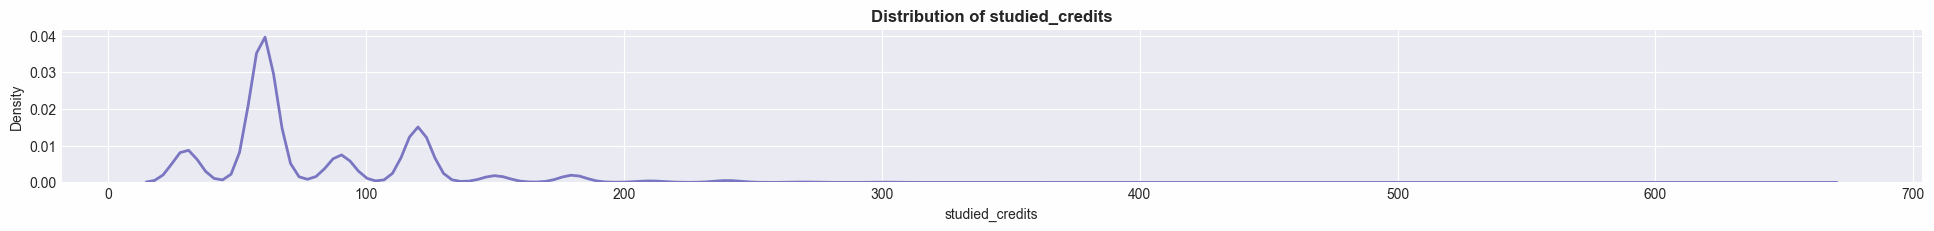

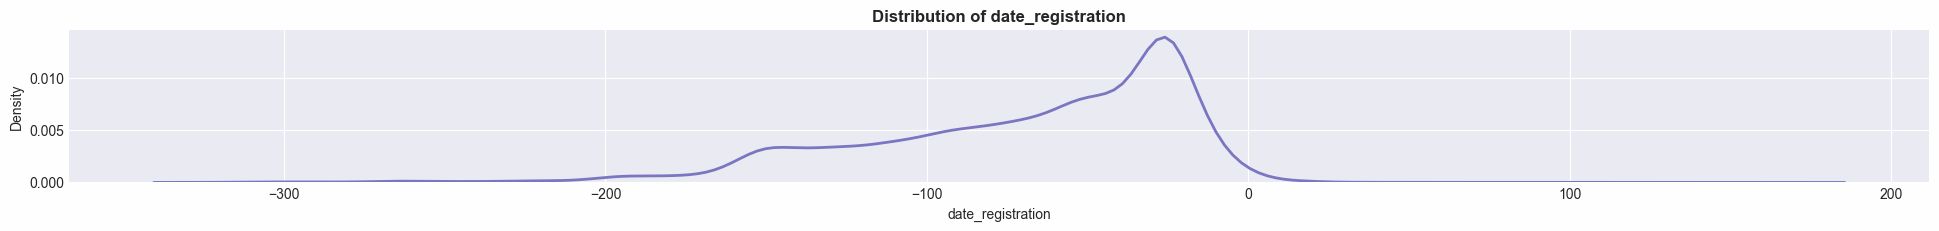

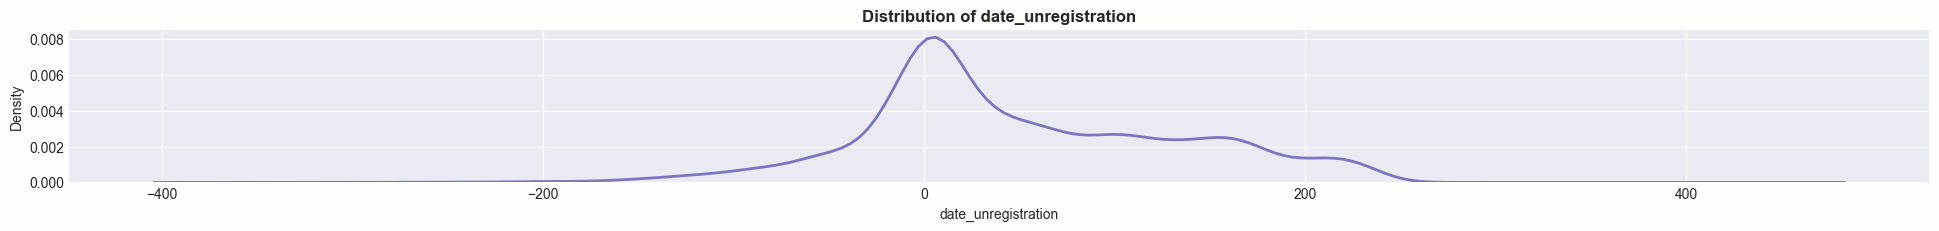

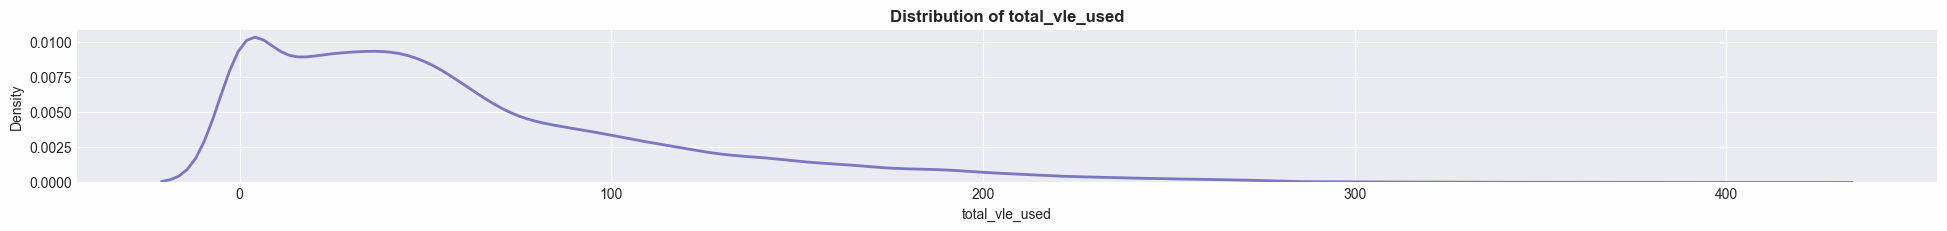

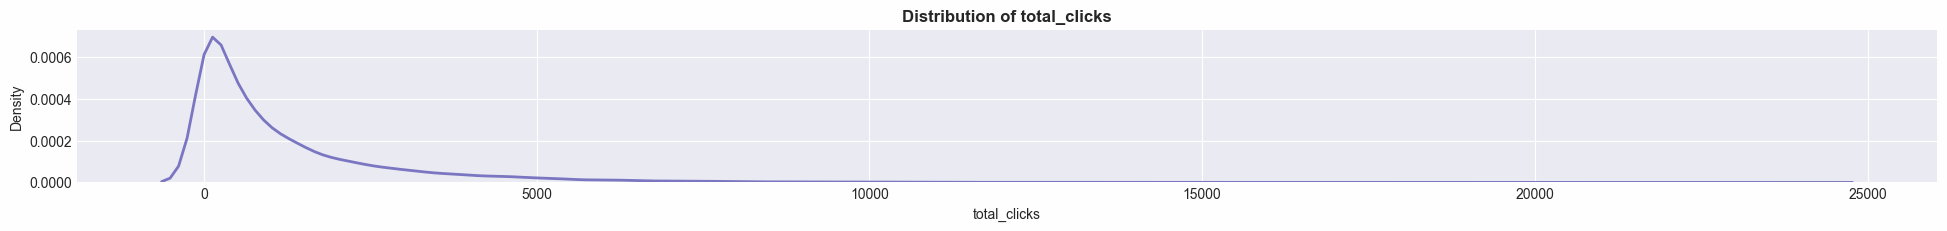

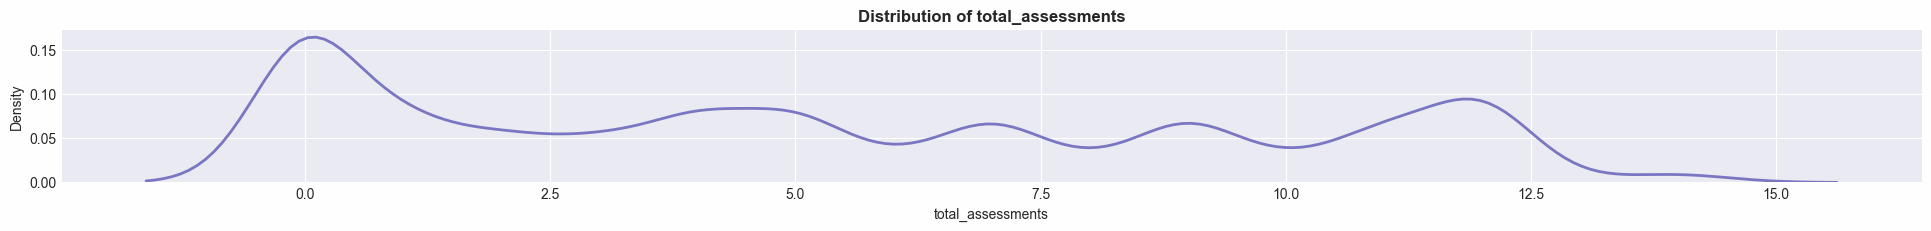

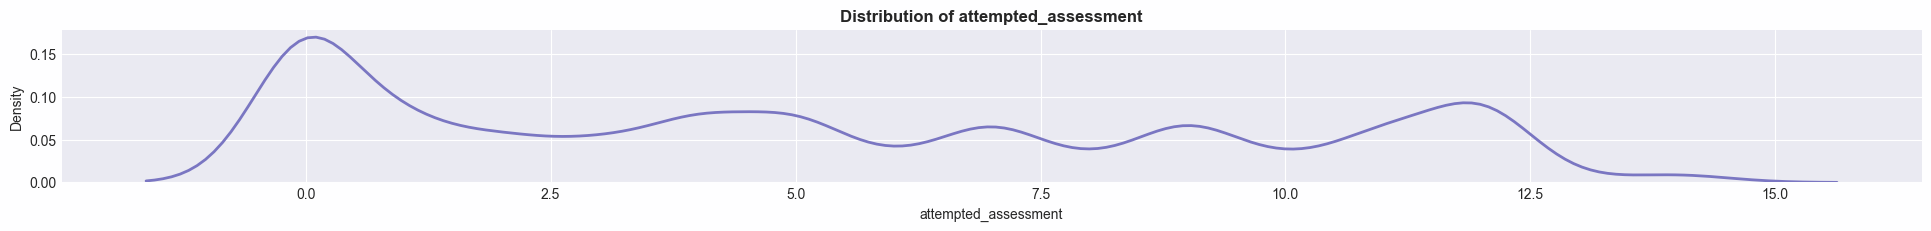

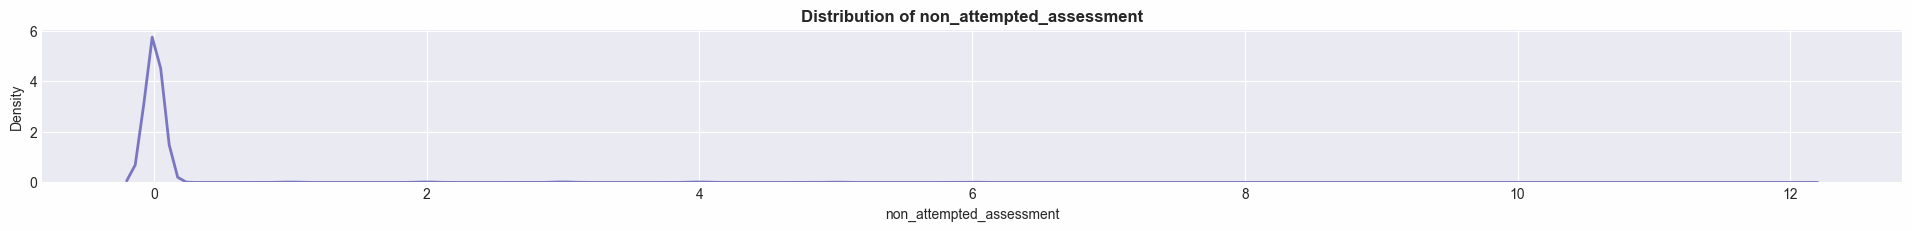

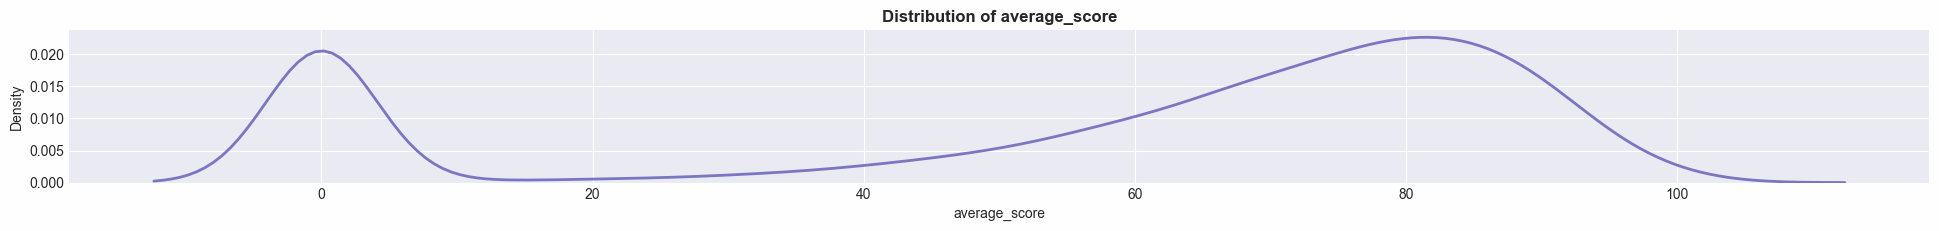

In [17]:
limit = len(large_num_cols)
for i,column in enumerate(large_num_cols):
    if i> limit:
        break
    fig = plt.figure(figsize=(24,21))
    plt.subplot(9,1,i+1)
    P.plot_kde(column=column,data=data)
    plt.show()

### ***Insights from univariate analysis of numerical columns***

- most of the values of `number_of_previous_attempts` column is around `0`

- `studied_credit` column is skewed towards right with most values around the median

- `date_registration` column have a peak before 0

- `date_unregistration` column vales peaks around 0

- `total_vle_used` column is skewed towrds the bigger side

- `total_clicks` column is heavily skewed to the bigger side with more values near 0

- `total_assessment` column is someway uniformly distributed with more values around 0

- `attempted_assessment` follows same distribution as total_assessment

- `non_attempted_assessment` is skewed towards right with more values around 0

- `average_score` have 2 peaks one at bigger end and one at 0

In [18]:
for cols in large_cat_cols:
    df = data[cols].value_counts(normalize=True).mul(100).round(2).reset_index(name = r"% of observations").sort_values(by ="% of observations", ascending = False ).head(10)
    display(df)
    display("_"*50)

,region,% of observations
0,Scotland,10.57
1,East Anglian Region,10.25
2,London Region,9.87
3,South Region,9.49
4,North Western Region,8.92
5,West Midlands Region,7.92
6,South West Region,7.47
7,East Midlands Region,7.26
8,South East Region,6.48
9,Wales,6.40


'__________________________________________________'

### ***Insights from univariate analysis of large categorical columns***

- `region` column is divided into `13` classes and `scotland` occured most of the times

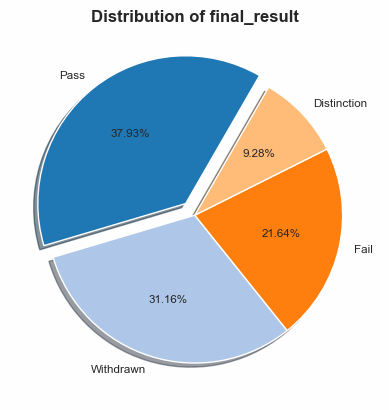

In [19]:
P.plot_pie('final_result',data=data)

### ***Insight from univariate analysis of target column***

- `31%` of occurances are withdrawn in the `final_result` column

***

## **Bivariate Analysis with `final_result` column**

### **Categorical Columns with small sub-caetgories with target**

In [20]:
small_cat_cols

['code_module',
 'code_presentation',
 'gender',
 'highest_education',
 'imd_band',
 'age_band',
 'disability',
 'num_of_prev_attempts']

**code_module**

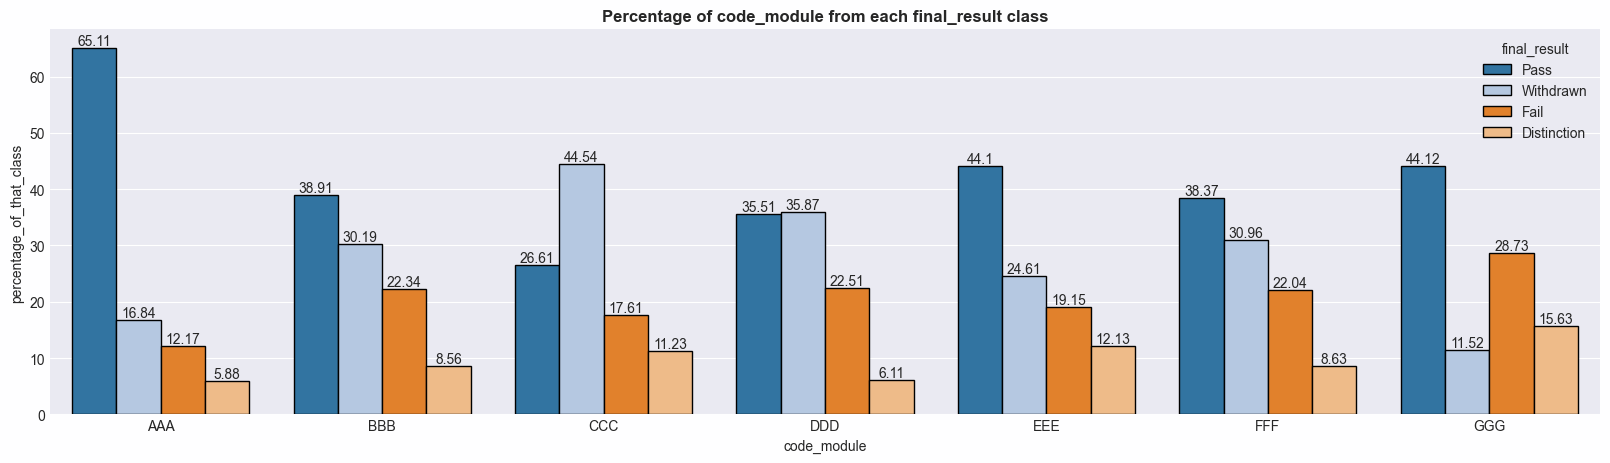

In [21]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='code_module',data=data,target='final_result',orient='v')

**code module ccc is showing high percentage of withdrawn students**

In [22]:
code_module_mask = (data['code_module']=='CCC')
ct = pd.crosstab(code_module_mask,data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.127 → Moderate


**code module has moderate relationship with target column**

***

**code_presentation**

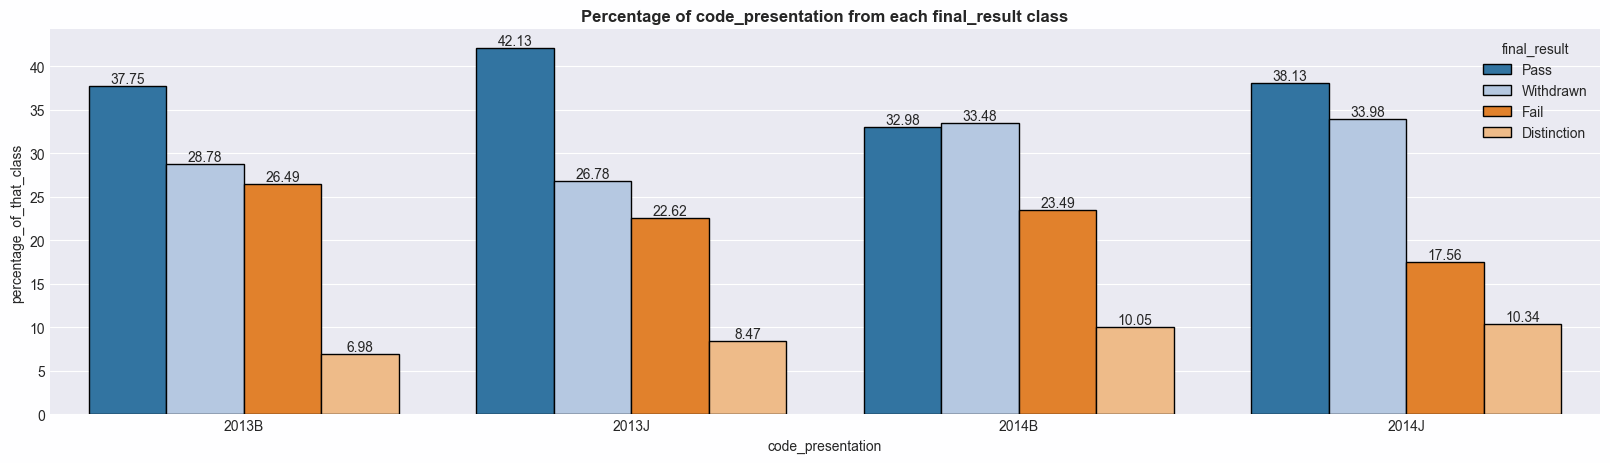

In [23]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='code_presentation',data=data,target='final_result',orient='v')

**no strong relationship found**

***

**gender**

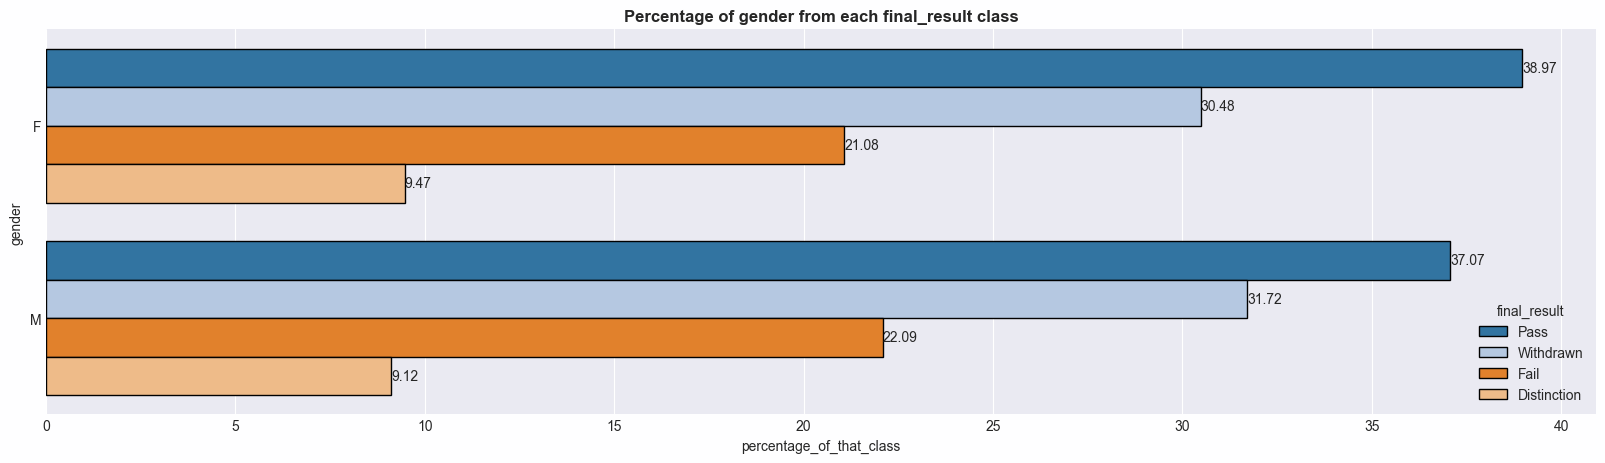

In [24]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='gender',data=data,target='final_result',orient='h')

**No strong difference found between classes**

***

**highest education**

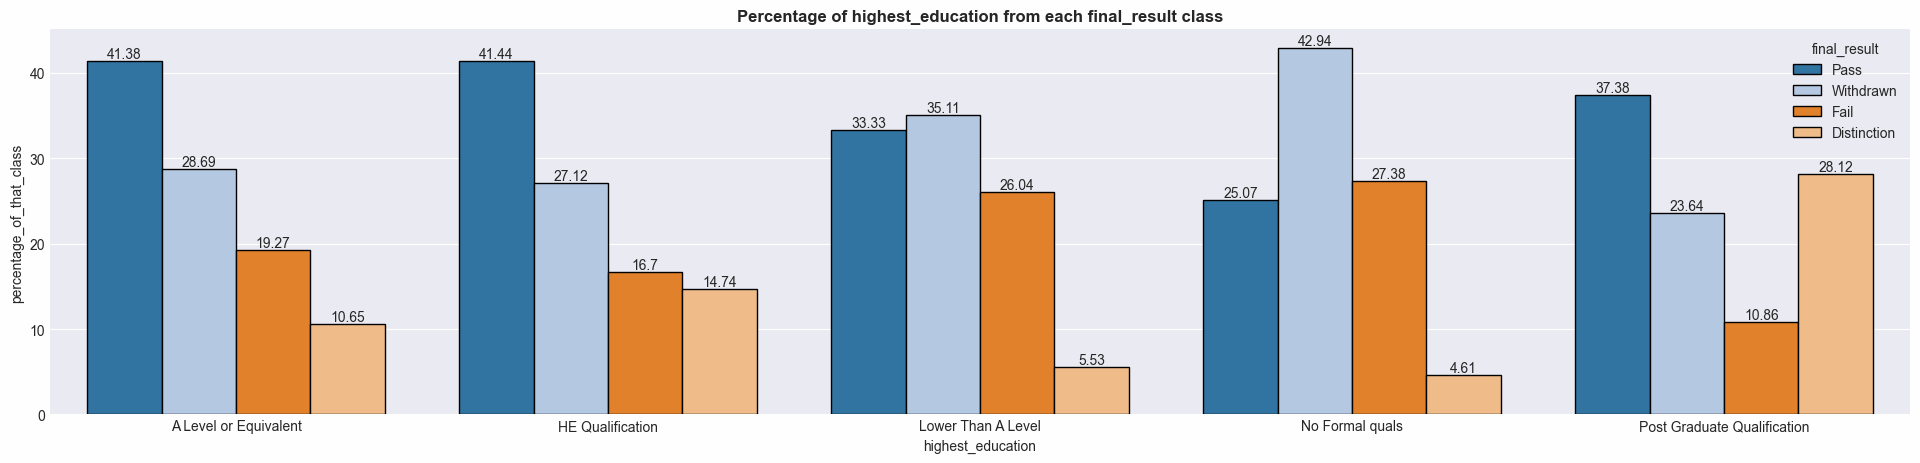

In [25]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='highest_education',data=data,target='final_result',orient='v')

**No formal quals and lower than a level is showing high percentage of withdrawls**

In [26]:
highest_education_mask = (data['highest_education']=='Lower Than A Level') | (data['highest_education']=='No Formal quals')
ct = pd.crosstab(highest_education_mask,data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.160 → Moderate


**higest education holds moderate relationship with final result column**

***

**imd_band**

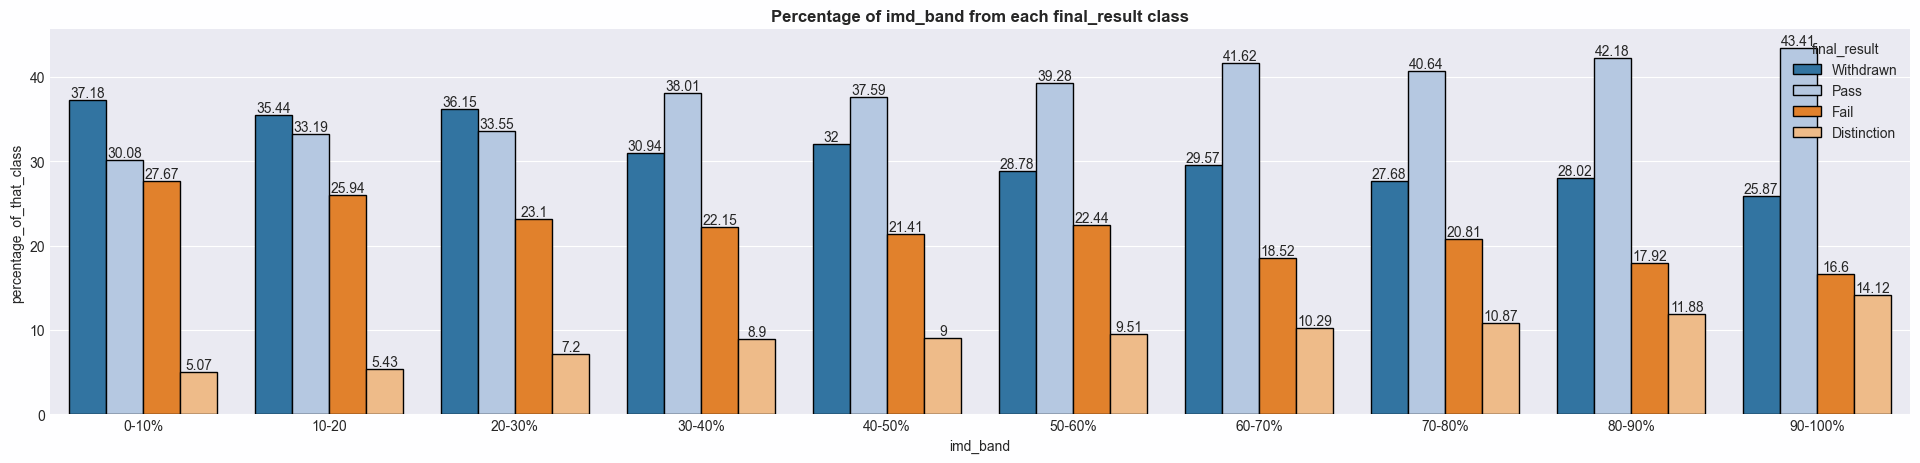

In [27]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='imd_band',data=data,target='final_result',orient='v')

In [28]:
ct = pd.crosstab(data['imd_band'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.084 → Weak


**imd_band have weak relationship with final result**

***

**age_band**

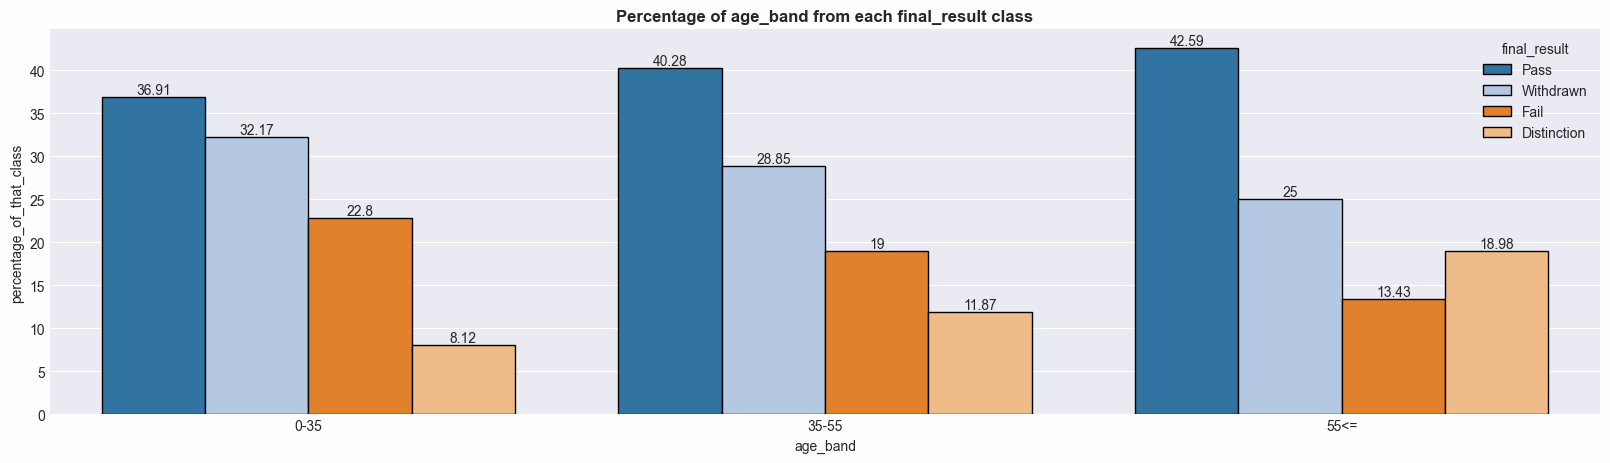

In [29]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='age_band',data=data,target='final_result',orient='v')

In [30]:
ct = pd.crosstab(data['age_band'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.058 → Weak


**age band have weak relationship with final result**

***

**disability**

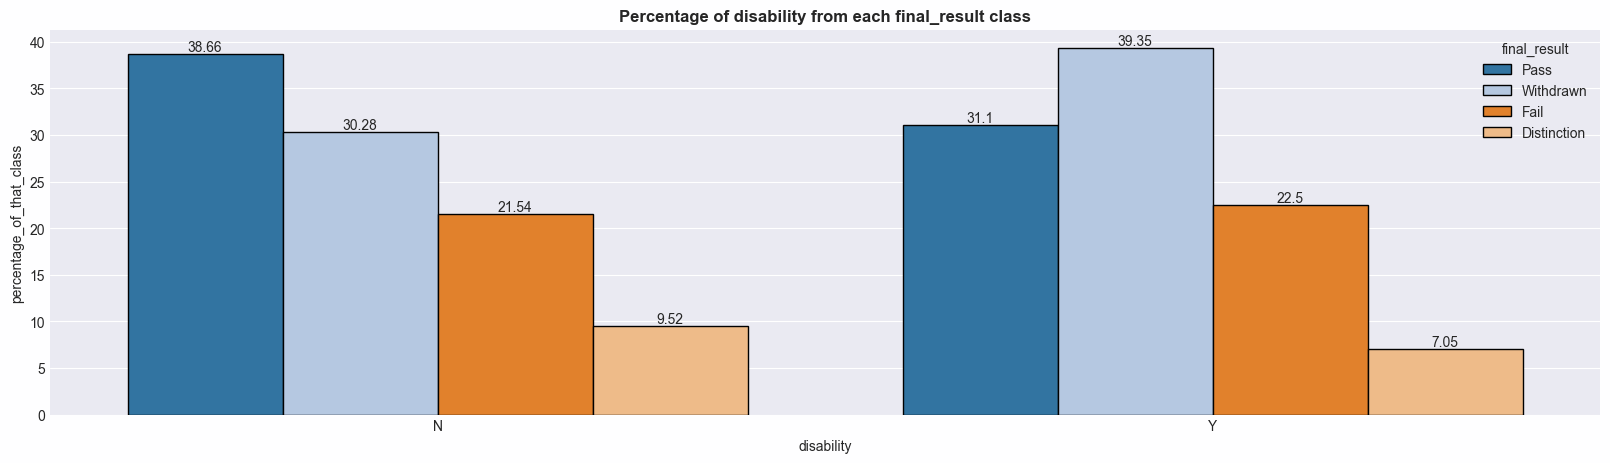

In [31]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='disability',data=data,target='final_result',orient='v')

In [32]:
ct = pd.crosstab(data['disability'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.065 → Weak


**disability have weak relationship with final_result**

***

### **Numerical Column with `final_result`**

**studied credits**

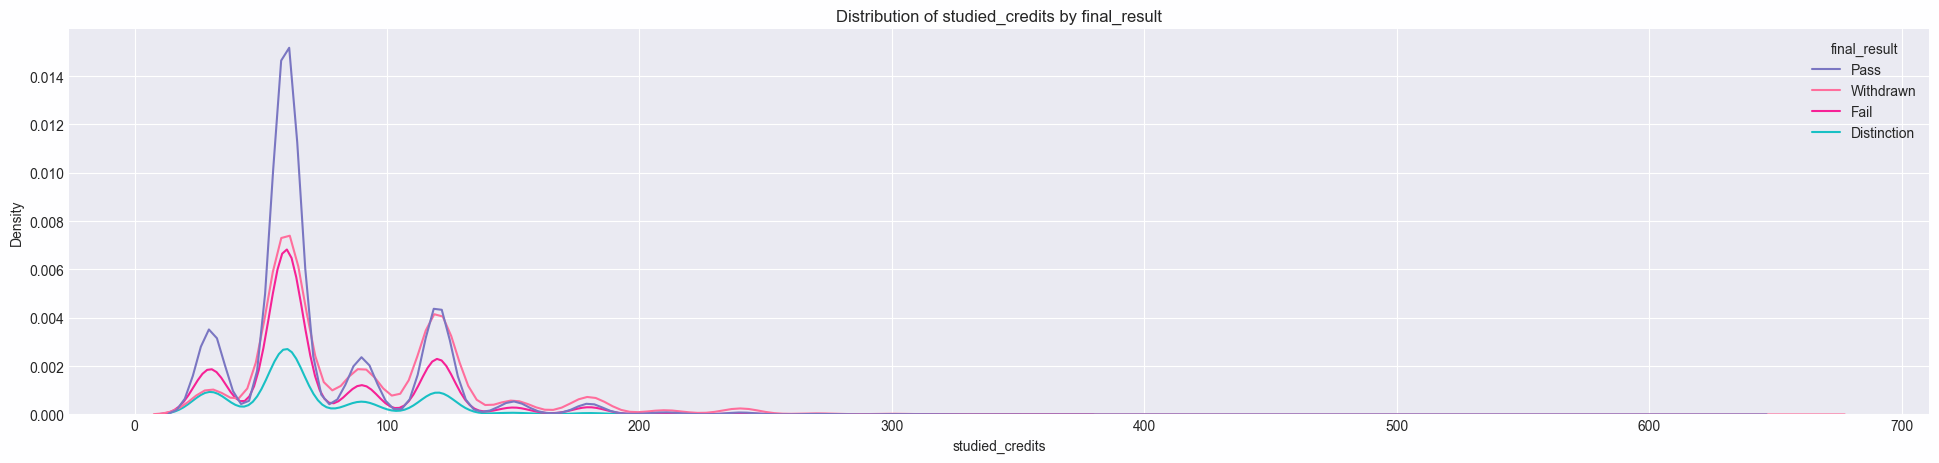

In [33]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='studied_credits',data= data,target='final_result')

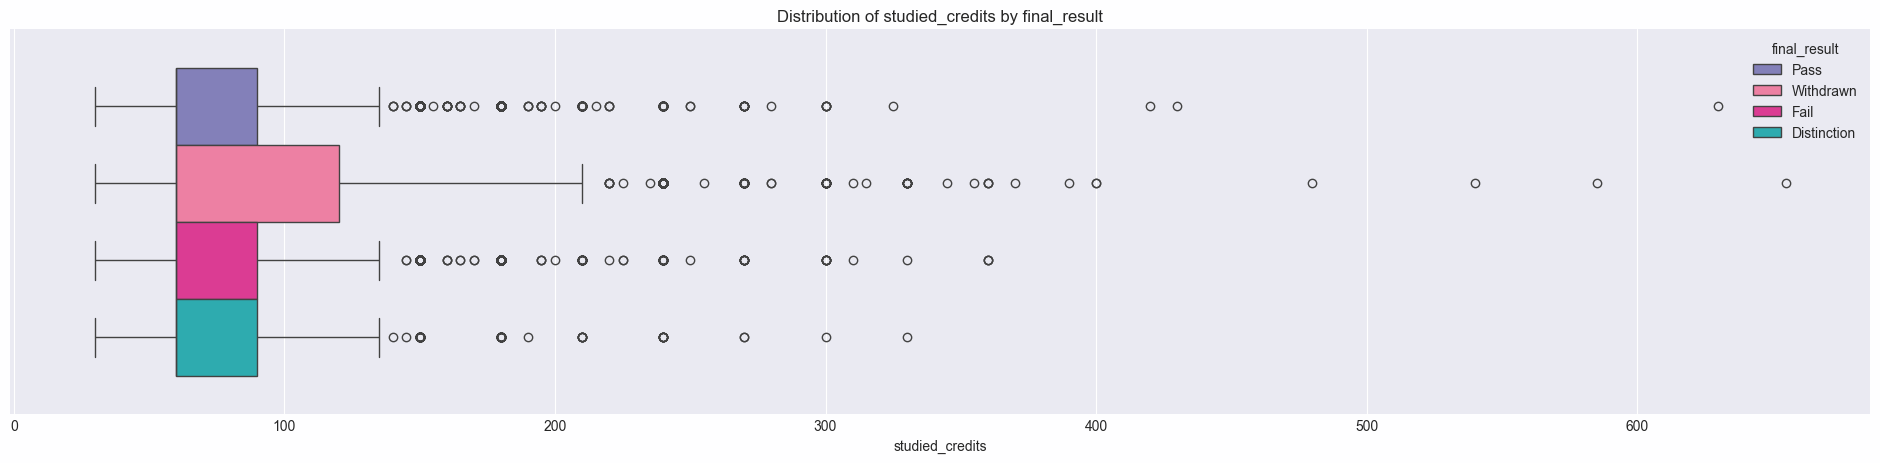

In [34]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='studied_credits',data= data,target='final_result')

In [35]:
data.groupby('final_result')['studied_credits'].mean().round(2)

final_result
Distinction    71.76
Fail           76.09
Pass           74.22
Withdrawn      91.43
Name: studied_credits, dtype: float64

**average studied credit showing high mean compared to others for withdrawn candidates**

In [36]:
S.numerical_test(data,'final_result','studied_credits','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: weak


**groups are different in studied_credits, but strength is weak**

***

**num_of_prev_attempts**

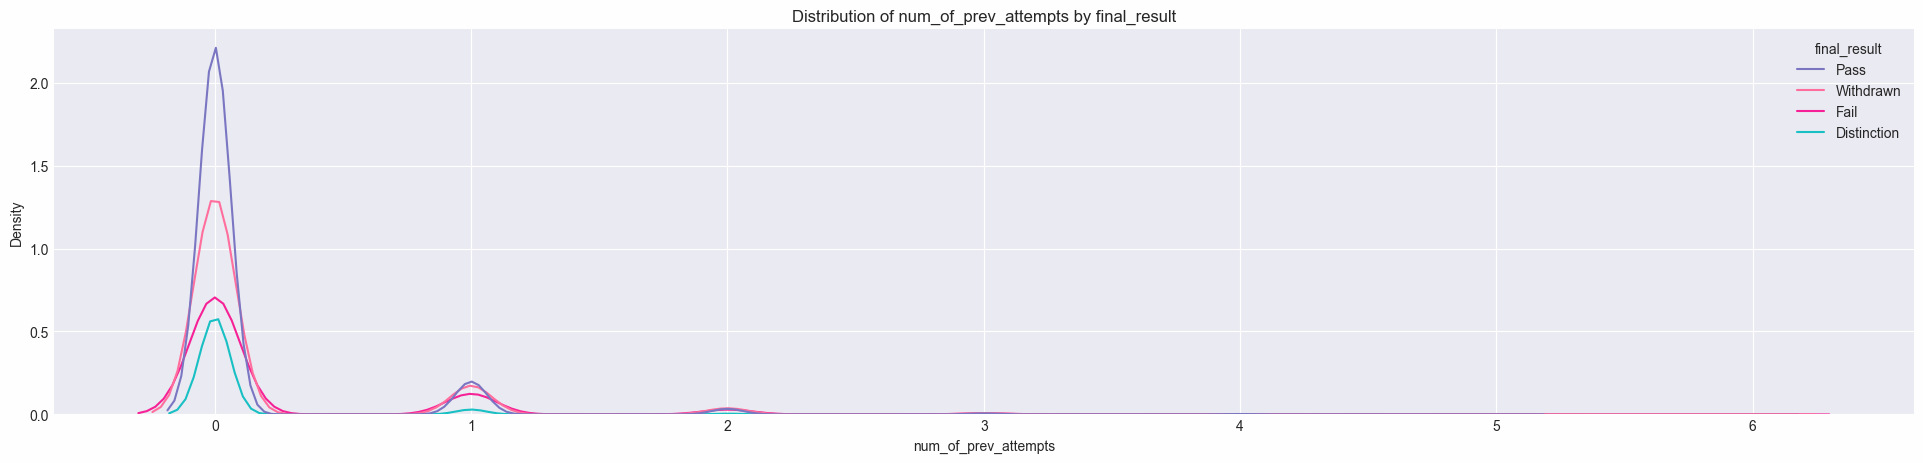

In [37]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='num_of_prev_attempts',data= data,target='final_result')

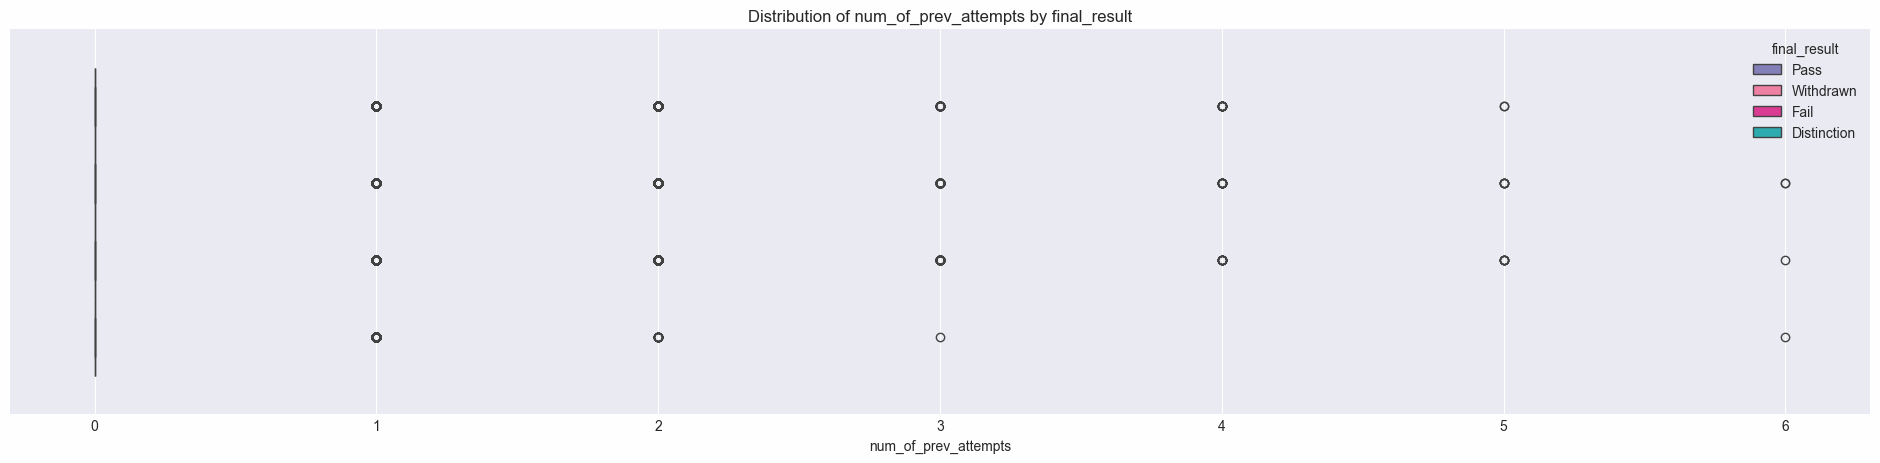

In [38]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='num_of_prev_attempts',data= data,target='final_result')

In [39]:
data.groupby('final_result')['num_of_prev_attempts'].mean().round(2)

final_result
Distinction    0.06
Fail           0.25
Pass           0.12
Withdrawn      0.19
Name: num_of_prev_attempts, dtype: float64

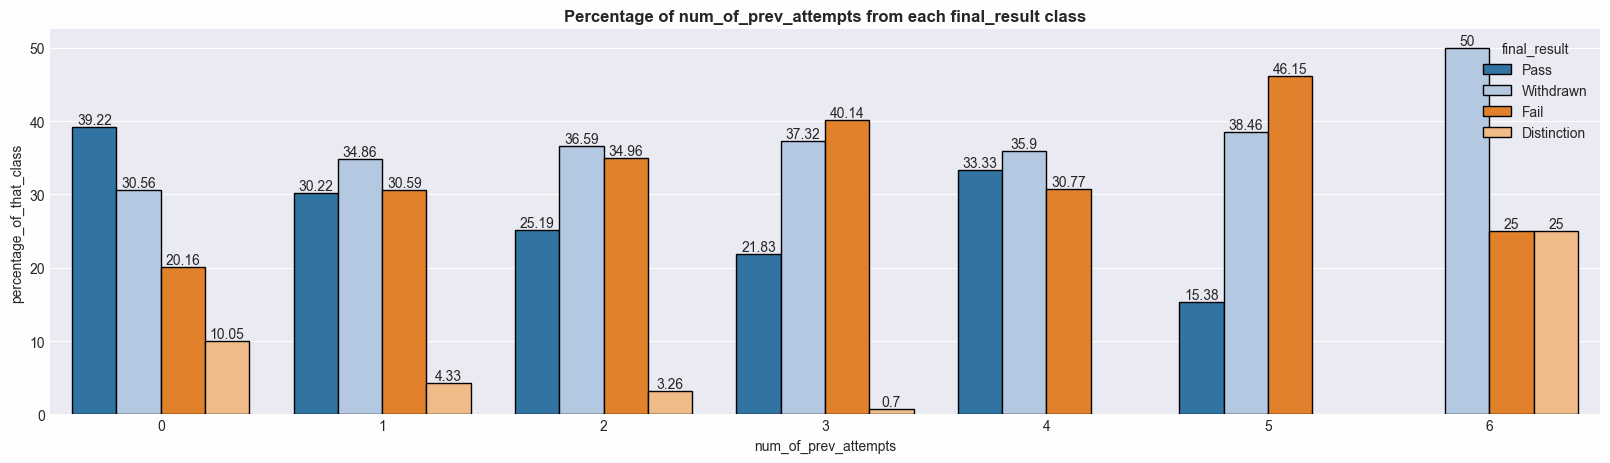

In [40]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='num_of_prev_attempts',data=data,target='final_result',orient='v')

**num of previous attempt is showing higher the attempts, more of the chance of readmission**

In [41]:
ct = pd.crosstab(data['num_of_prev_attempts'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Cramer's V: 0.073 → Weak


**althoug num_of_prev_attempts have weak relationship with target column**

***

**date_registration**

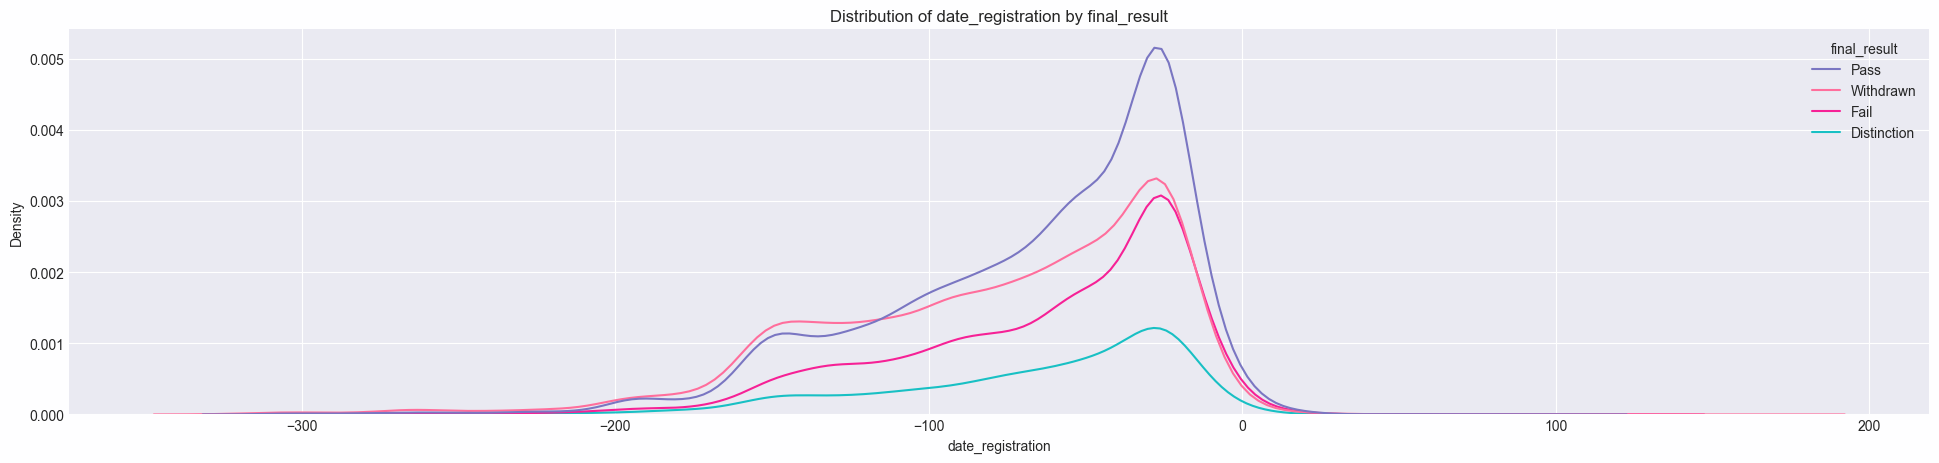

In [44]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='date_registration',data= data,target='final_result')

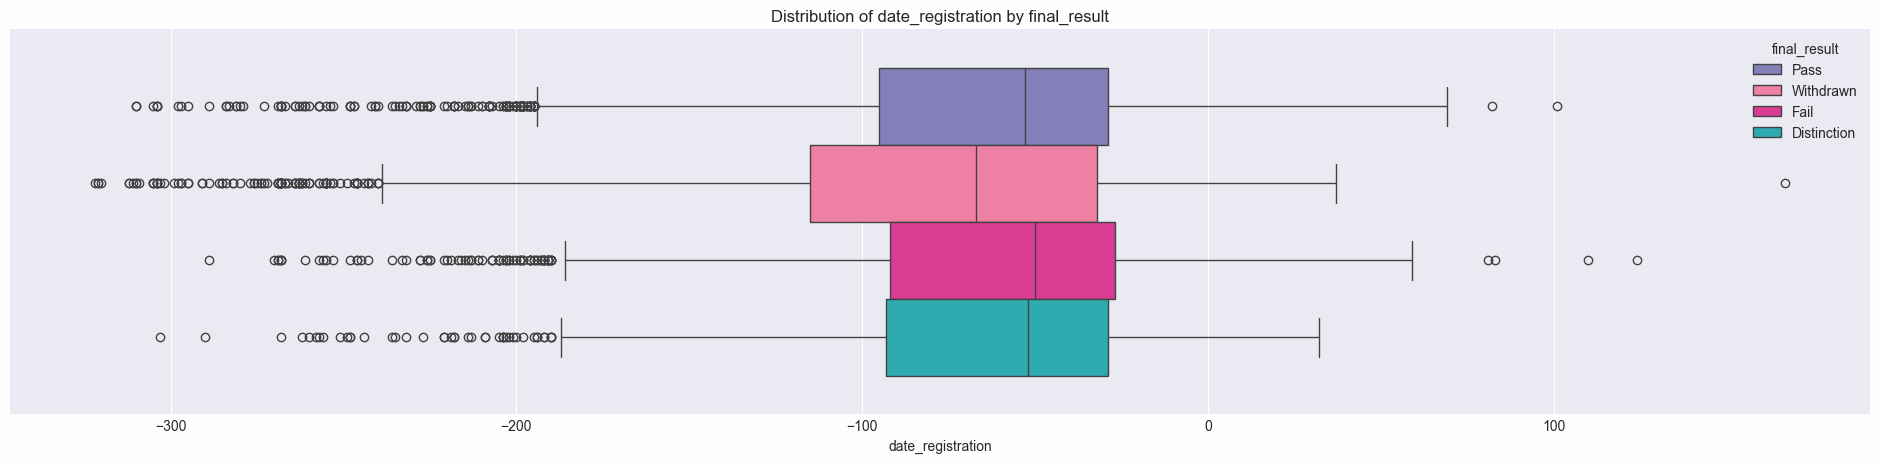

In [45]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='date_registration',data= data,target='final_result')

In [46]:
data.groupby('final_result')['date_registration'].mean().round(2)

final_result
Distinction   -65.64
Fail          -62.81
Pass          -66.71
Withdrawn     -78.35
Name: date_registration, dtype: float64

**Withdrawn candidates ae showing less mean for date_registration**

In [42]:
S.numerical_test(data,'final_result','date_registration','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: weak


**groups are different in both withdrawn and not withdrawn class, with a weak realtionship**

***

**total_vle_used**

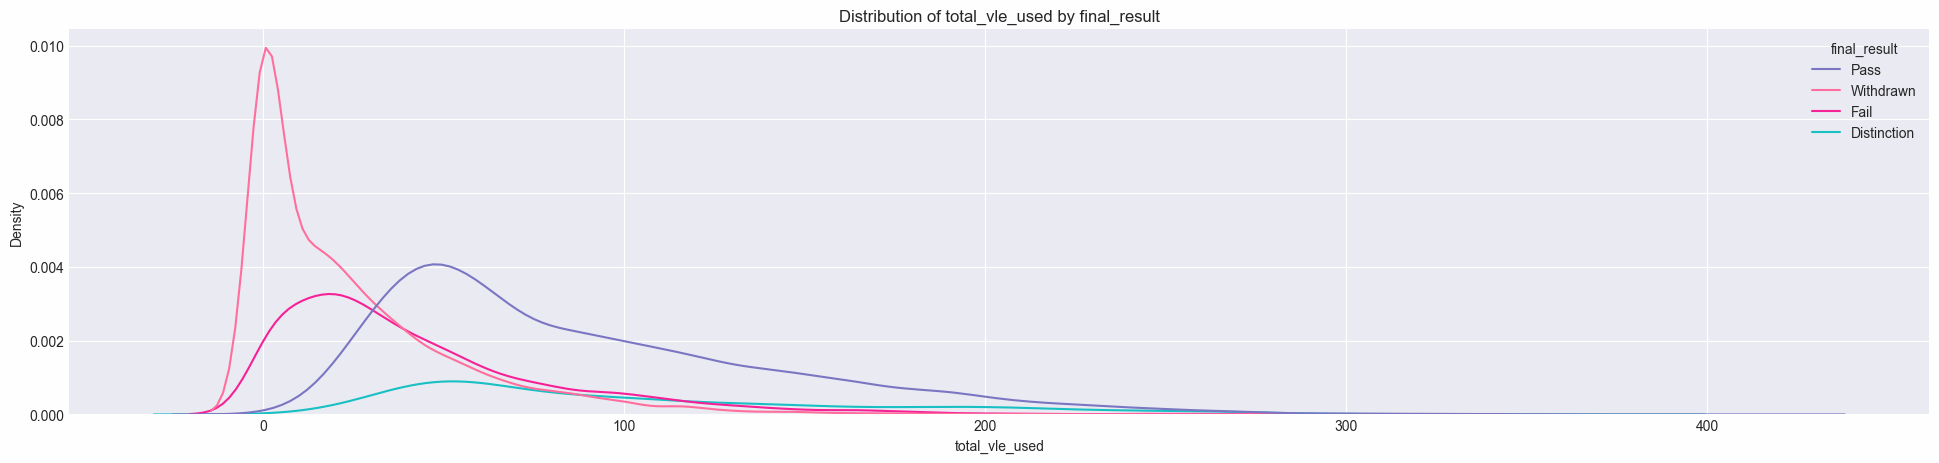

In [49]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_vle_used',data= data,target='final_result')

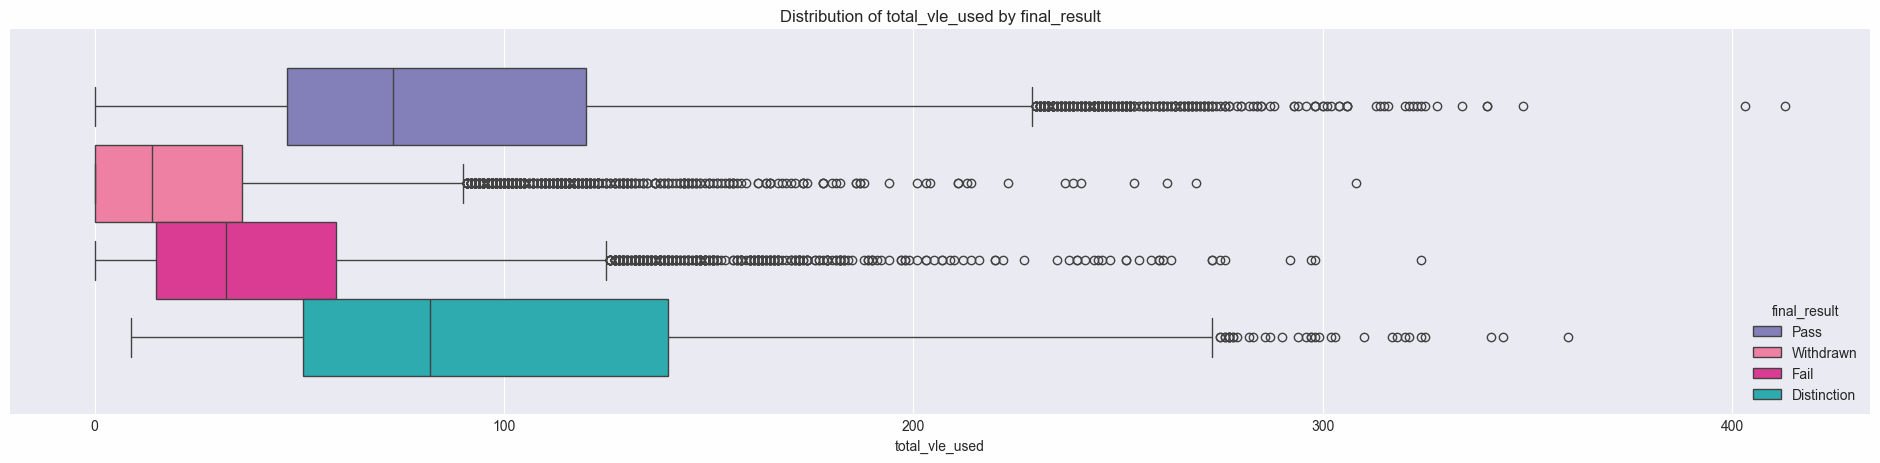

In [50]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_vle_used',data= data,target='final_result')

In [51]:
data.groupby('final_result')['total_vle_used'].mean().round(2)

final_result
Distinction    102.45
Fail            43.08
Pass            89.06
Withdrawn       24.23
Name: total_vle_used, dtype: float64

**for withdrawn class, total_vle_used is showing the least mean value**

In [43]:
S.numerical_test(data,'final_result','total_vle_used','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different in total_vle_used column, with a strong relationship**

***

**total_clicks**

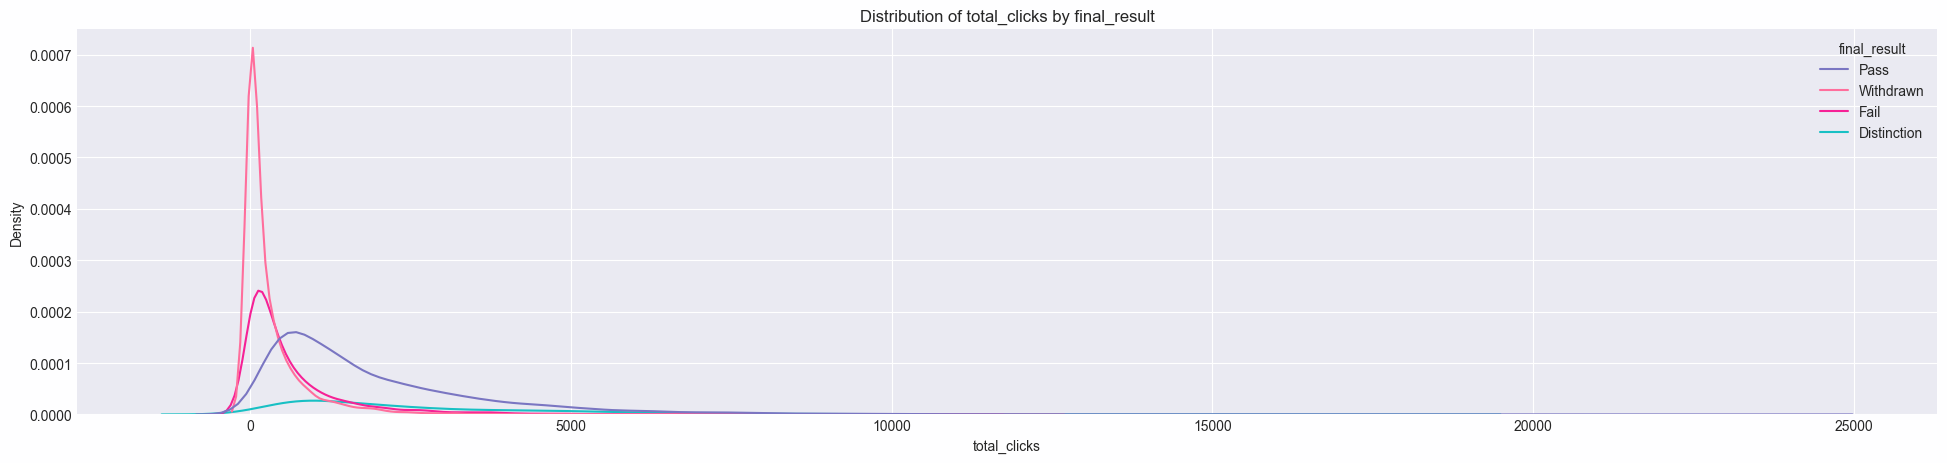

In [54]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_clicks',data= data,target='final_result')

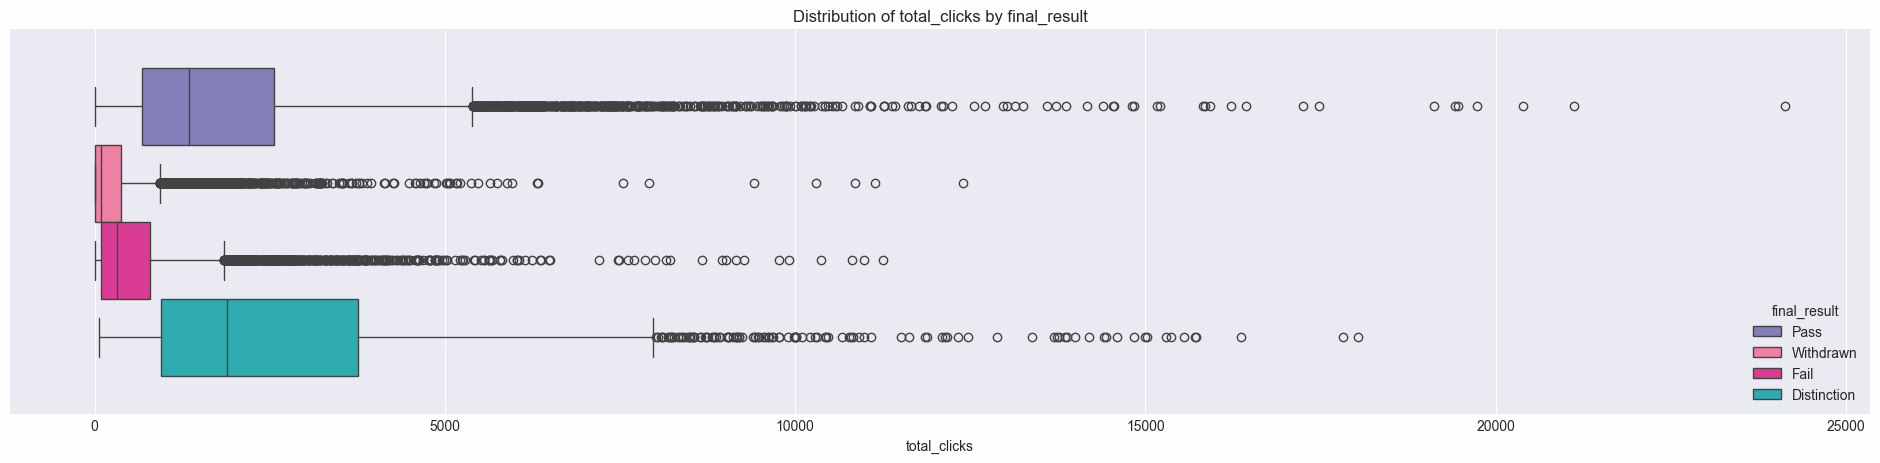

In [55]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_clicks',data= data,target='final_result')

In [56]:
data.groupby('final_result')['total_clicks'].mean().round(2)

final_result
Distinction    2666.76
Fail            651.85
Pass           1921.81
Withdrawn       313.95
Name: total_clicks, dtype: float64

**for withdrawn class, average total mean is the lowest**

In [44]:
S.numerical_test(data,'final_result','total_clicks','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for total_clicks column, with strong relationship**

***

**total_assessments**

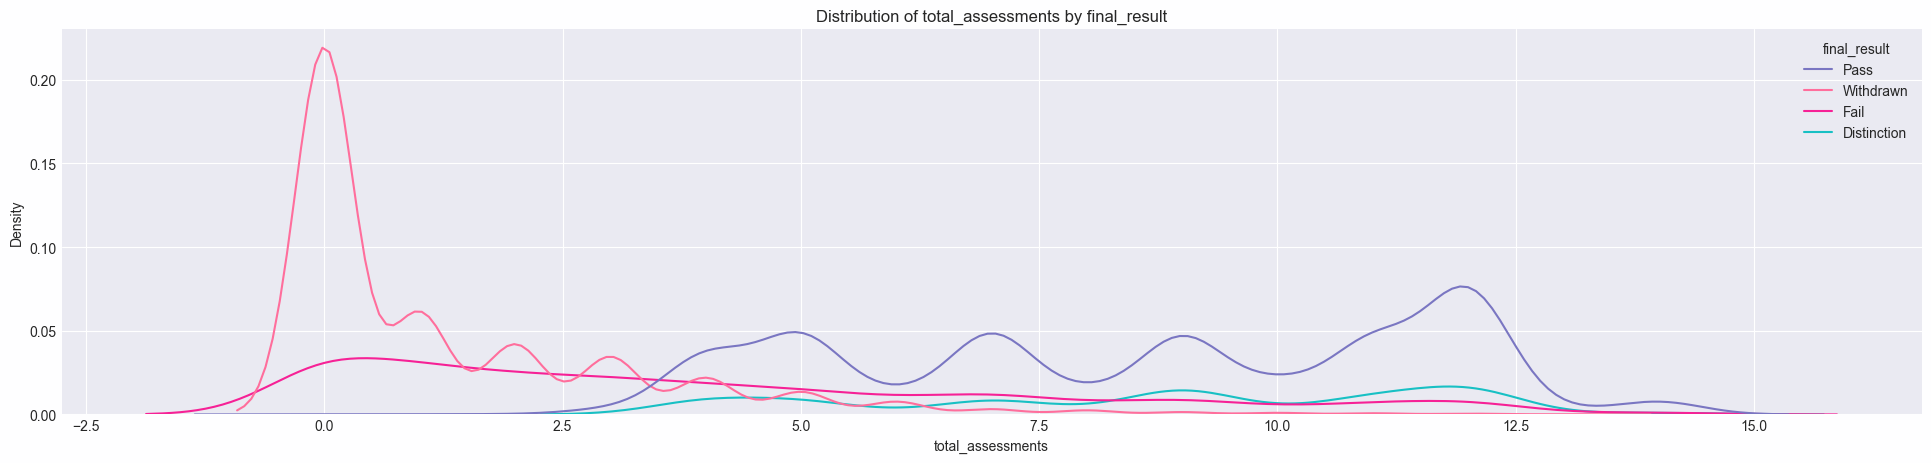

In [59]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_assessments',data= data,target='final_result')

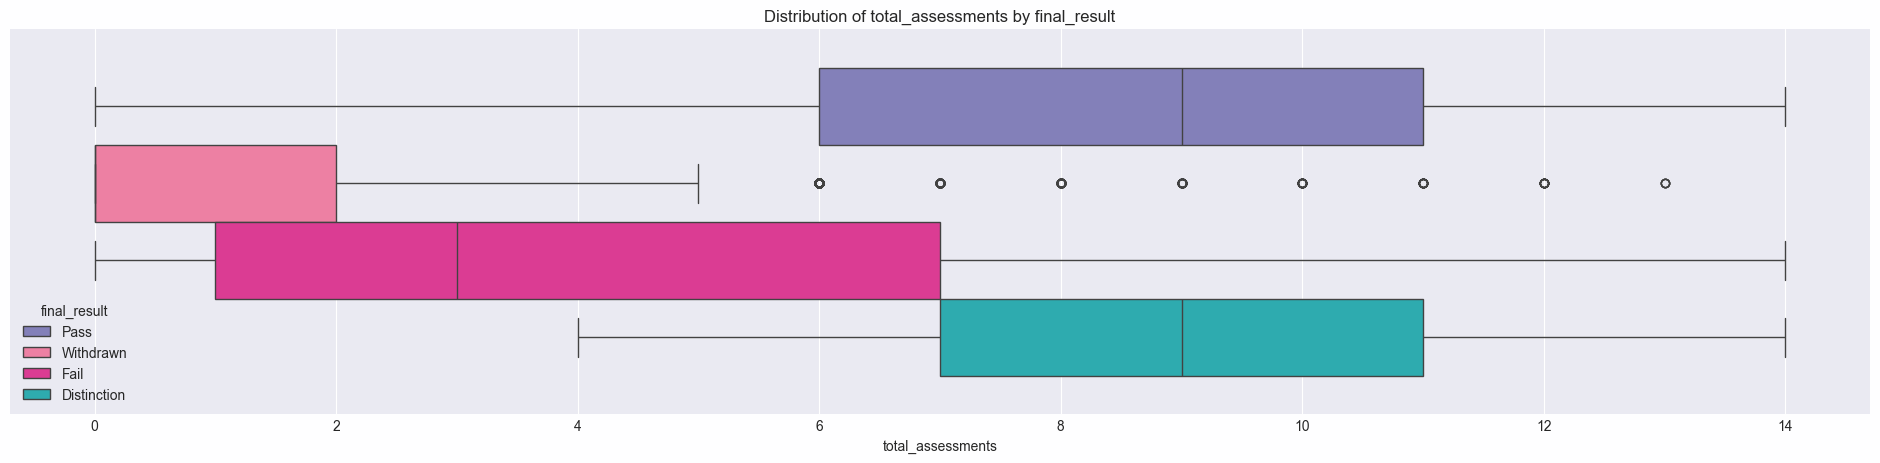

In [60]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_assessments',data= data,target='final_result')

In [61]:
data.groupby('final_result')['total_assessments'].mean().round(2)

final_result
Distinction    8.71
Fail           4.04
Pass           8.58
Withdrawn      1.29
Name: total_assessments, dtype: Float64

**mean value for total_assessments is least for withdrawn candidates**

In [45]:
S.numerical_test(data,'final_result','total_assessments','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for total_assessments class, with strong relationship**

***

**attempted_assessments**

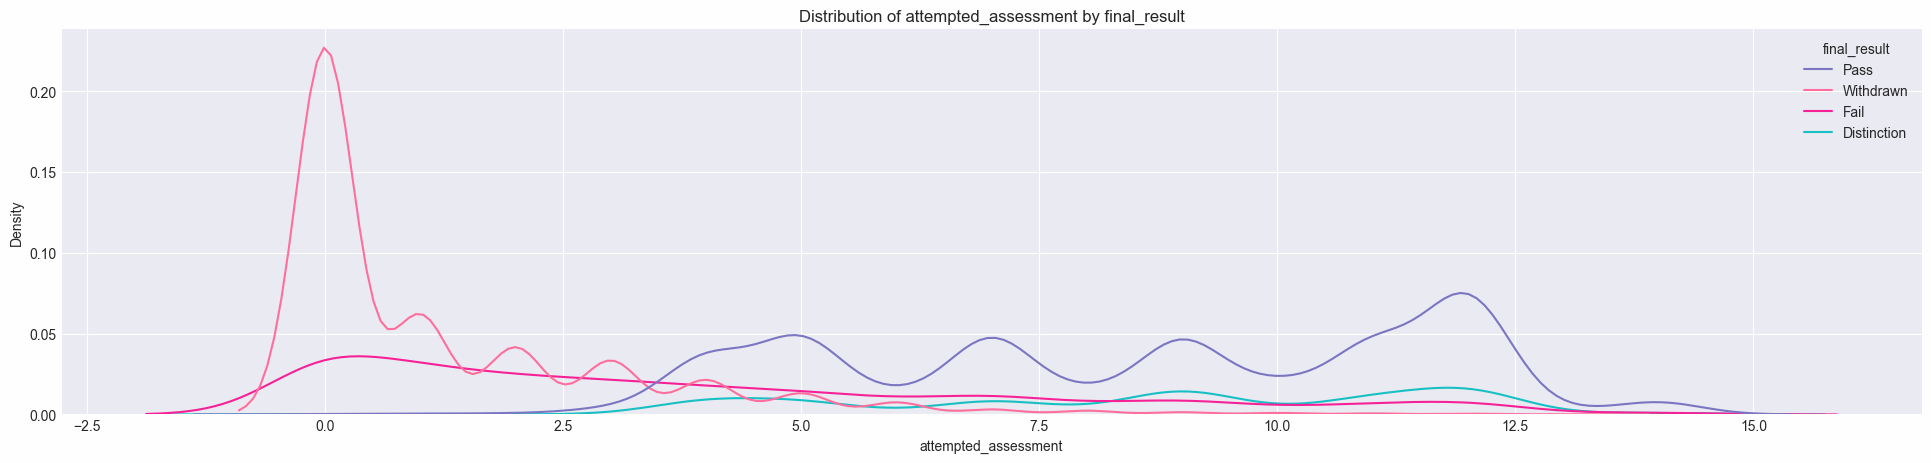

In [64]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='attempted_assessment',data= data,target='final_result')

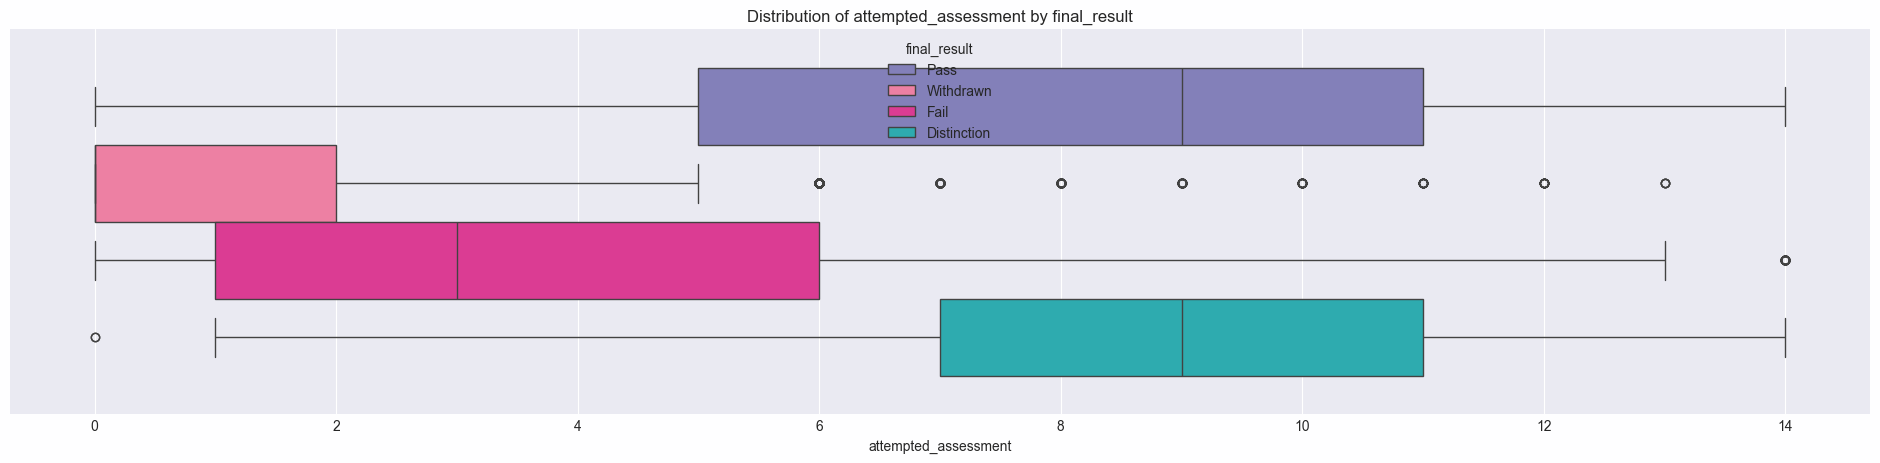

In [65]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='attempted_assessment',data= data,target='final_result')

In [66]:
data.groupby('final_result')['attempted_assessment'].mean().round(2)

final_result
Distinction    8.68
Fail           3.92
Pass           8.53
Withdrawn      1.25
Name: attempted_assessment, dtype: Float64

**mean of total_attempted_assessment is lowest for withdrawn class**

In [46]:
S.numerical_test(data,'final_result','attempted_assessment','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**attempted assessments groups for withdrawn class is different, with strong relationship**

***

**non_attempted_assessments**

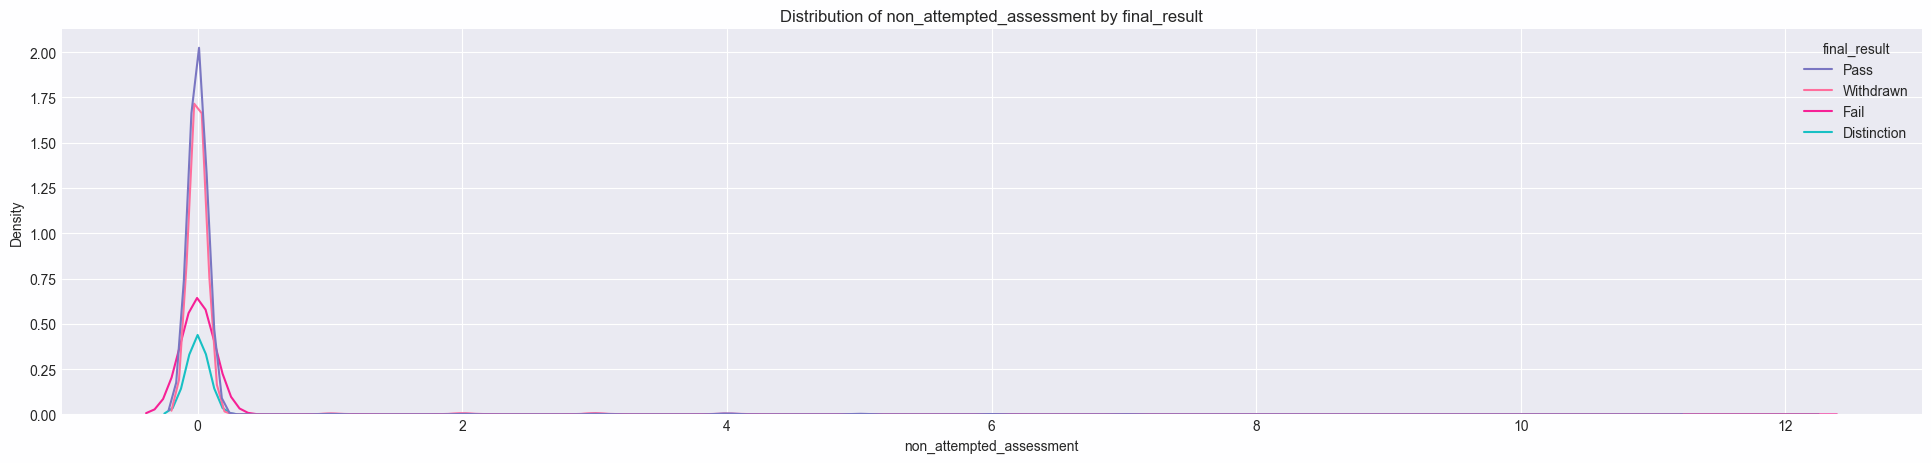

In [69]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='non_attempted_assessment',data= data,target='final_result')

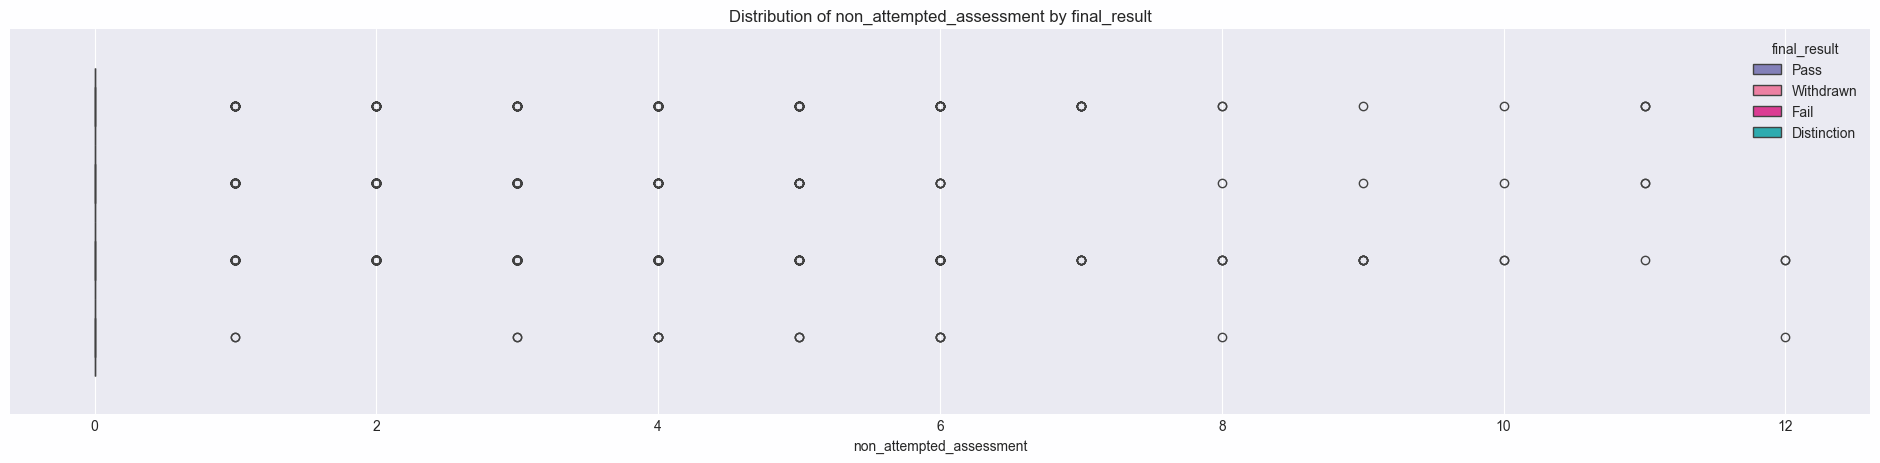

In [70]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='non_attempted_assessment',data= data,target='final_result')

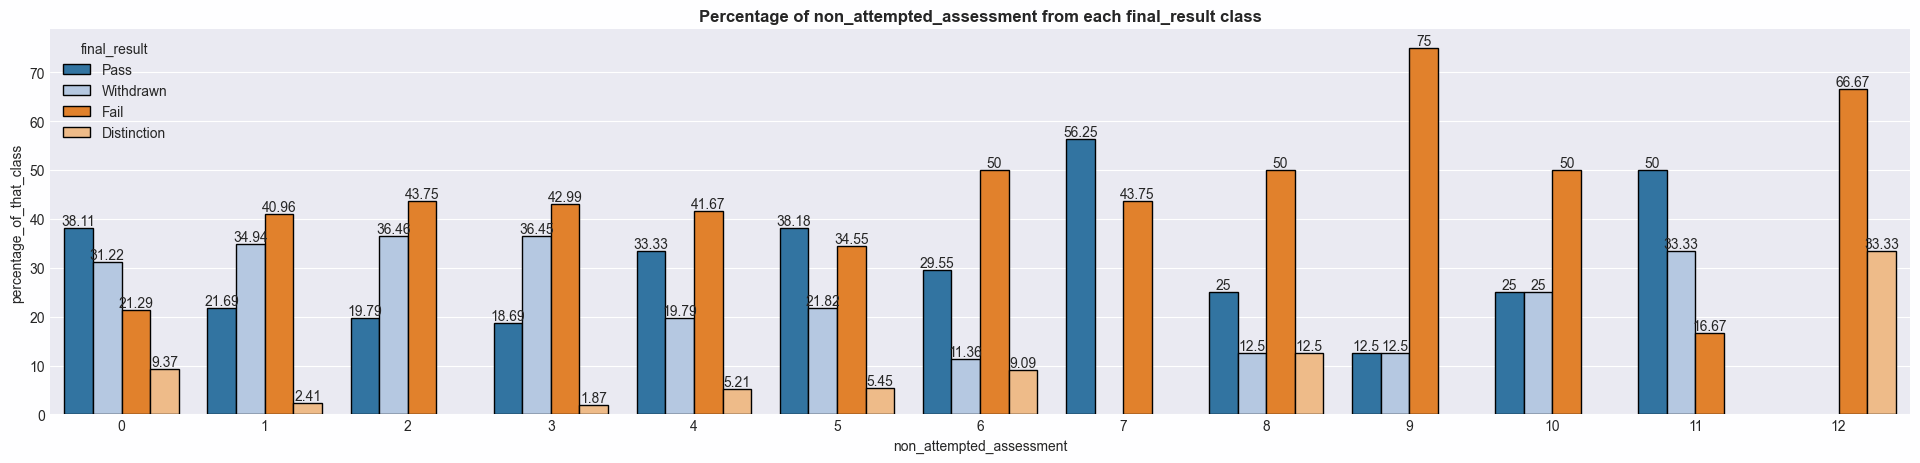

In [71]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='non_attempted_assessment',data=data,target='final_result',orient='v')

In [72]:
data.groupby('final_result')['non_attempted_assessment'].mean().round(2)

final_result
Distinction    0.03
Fail           0.12
Pass           0.05
Withdrawn      0.04
Name: non_attempted_assessment, dtype: Float64

**did not find any particular relationship**

***

**average_score**

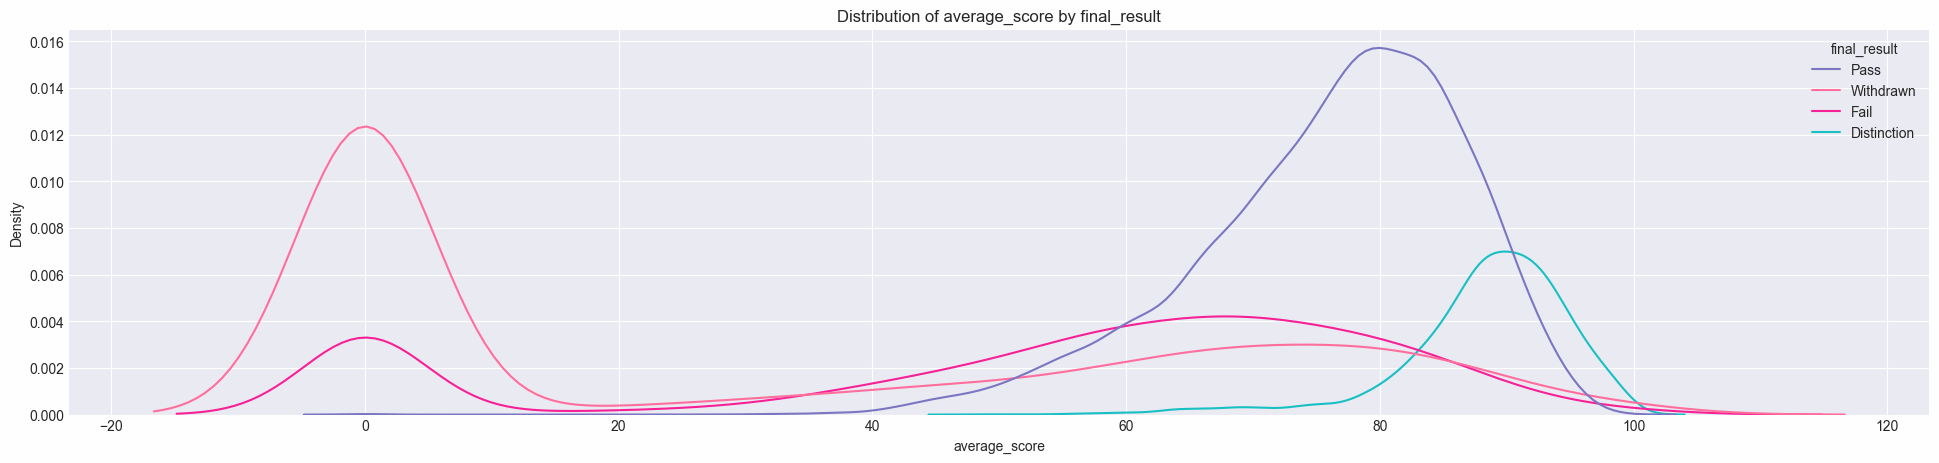

In [73]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='average_score',data= data,target='final_result')

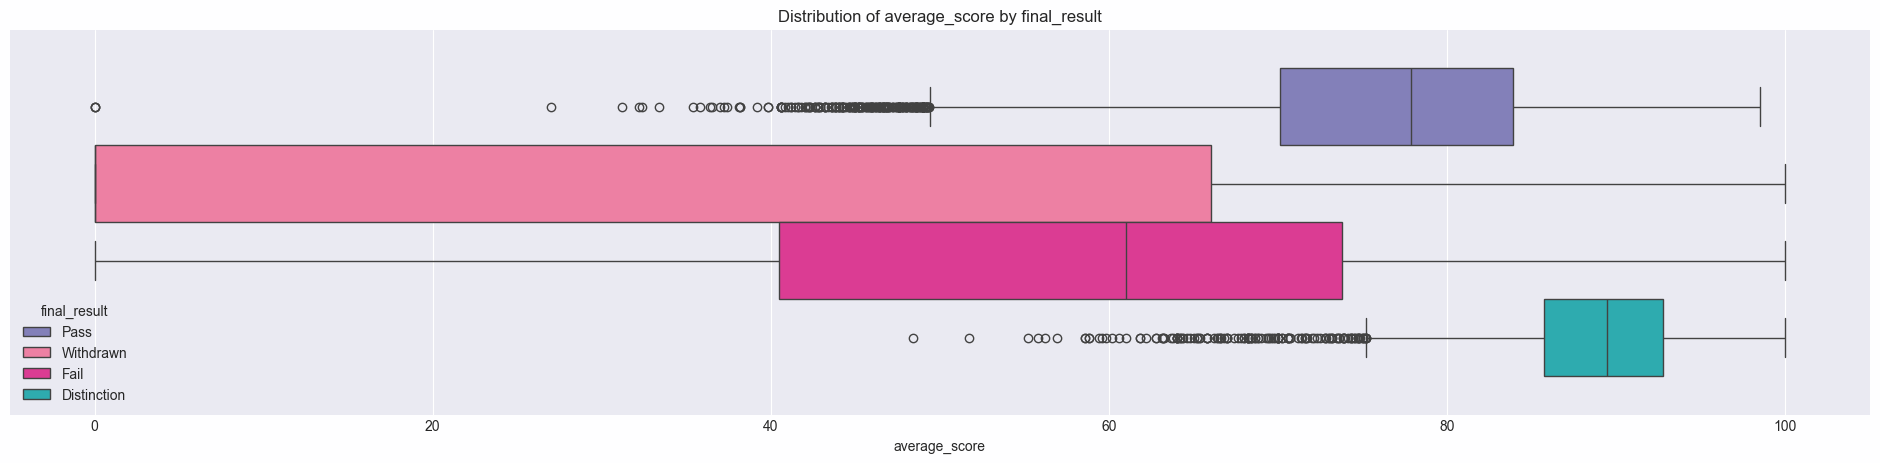

In [74]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='average_score',data= data,target='final_result')

In [75]:
data.groupby('final_result')['average_score'].mean().round(2)

final_result
Distinction    88.49
Fail           52.51
Pass           76.16
Withdrawn      29.50
Name: average_score, dtype: float64

**mean value of average score in withdrawn class is the least**

In [47]:
S.numerical_test(data,'final_result','average_score','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for withdrawn class, with strong relationship**

***

### ***Findings from bivariate analysis with target column***

***Categorical with final_result***

- `CCC` value in code_module is showing high percentage of withdrawn observations, after doing statistical analysis we can validate that `code_module` have weak relationship with final result column

- `no fromal quals` value in highest_education is showing high percentage of withdrawn observations, after doing statistical test we can validate a moderate relationship with `final_result`

- `imd_band` is showing a relationship, smaller the imd_band more the withdrawn observation, but after doing statistical analysis we can see that there is a weak relationship between `imd_band` and `final_result` column

- `age_band` is showing higher the `age_band` less the chance of withdrawn, but after doing statistical test we see that the relationship is weak

- `Y` in `disability` is showing high percentage of withdrawn, after doing statistical test, we can validate that there is weak relationship between `disability` and `final_result`

***Numerical with final_result***

- for `withdrawn` category `studied_credits` column have high mean compared to other categories, after doing statistical test we can validate that students who used high credits are more likely to withdraw but the strength of relationship is weak

- `num_of_previous_attempt` is showing relatively high percentage of withdrawn for value 6 but the relationship is weak

- `date_registration` is showing early registration have higher withdrawn with a weak relationship

- `total_vle_used` is showing that less vle usage leads to higher withdrawn, with a strong relationship

 - `total_click` is showing for withdrawn category average total_click is lowest, with a strong relationship

- `total_assessments` is showing for withdrawn category average total_assessments is lowest, with a strong relationship

- `attempted_assessment` is showing less the value is higher the chance of withdrawn, with a strong relationship

- `average_score` is showing low score leads to high withdrawn value, with a strong relationship